In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

In [2]:
X = np.array([0,1,2,3,4,5,6])
y = 2 * X + 5

In [3]:
y

array([ 5,  7,  9, 11, 13, 15, 17])

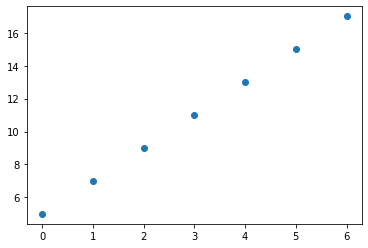

In [4]:
plt.scatter(X, y)

In [5]:
model = Sequential()
model.add(Dense(1,  input_dim = 1, activation = 'linear'))
adam = Adam(learning_rate=0.1)
model.compile(optimizer = adam,
              loss = 'mse', 
              metrics = ['mse'])

In [6]:
model.get_weights()

[array([[1.5398608]], dtype=float32), array([0.], dtype=float32)]

In [7]:
slope_values = []
bias_values = []
class get_model_weights(Callback):
    def on_epoch_end(self, batch, logs):
        slope, bias = model.get_weights()
        slope_values.append(slope[0][0])
        bias_values.append(bias[0])
callback = get_model_weights()

In [8]:
model.fit(X, y, epochs = 300, 
          verbose = False, 
          callbacks=[callback])

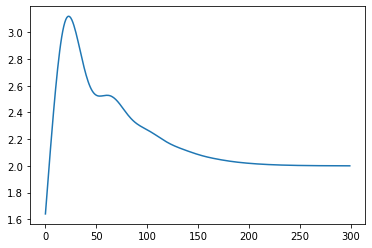

In [9]:
plt.plot(slope_values)

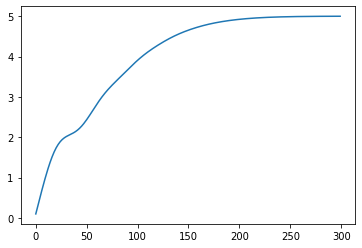

In [10]:
plt.plot(bias_values)